In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [25]:
X, y = load('../../preprocessing/clustering_data.joblib')

In [26]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

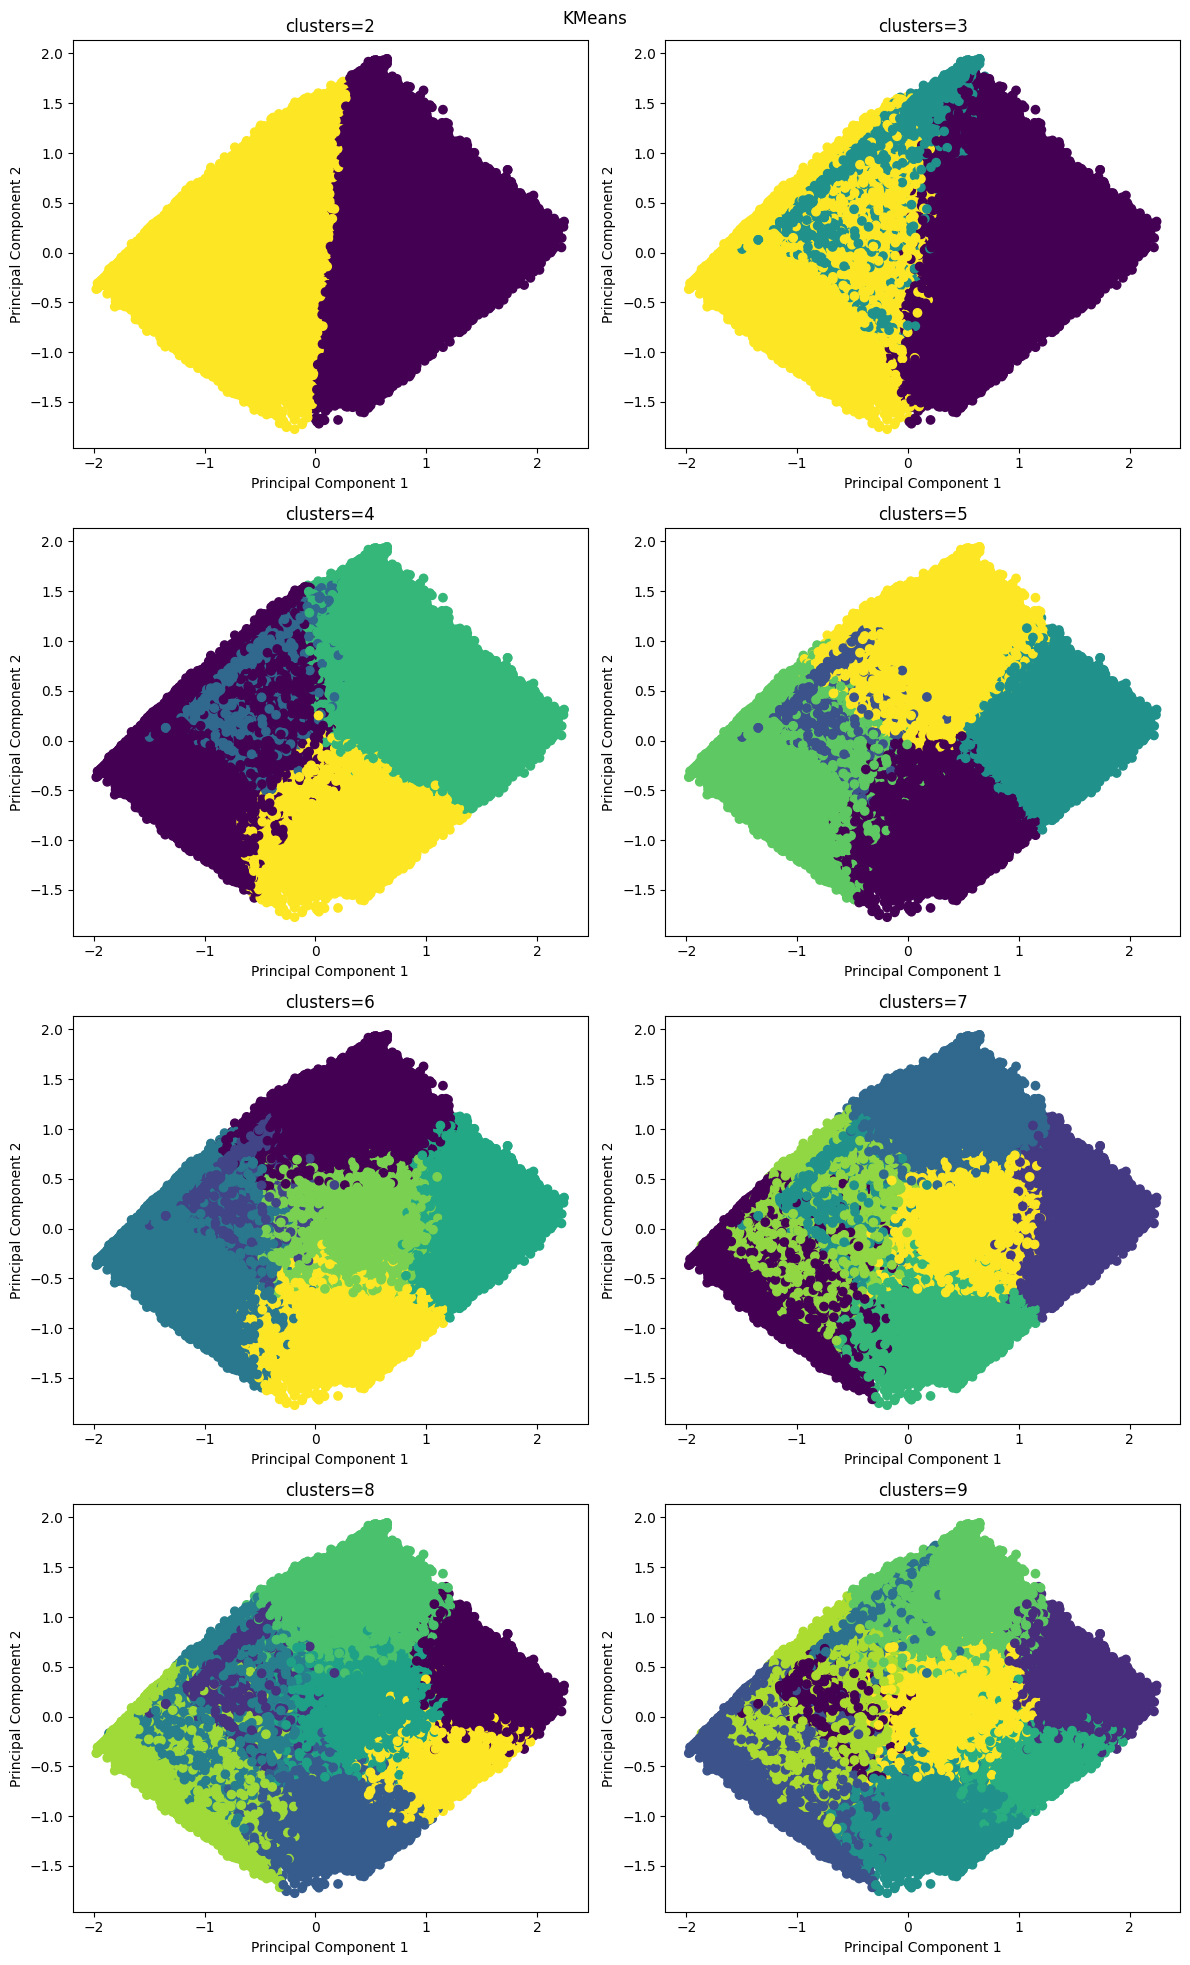

In [30]:
ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=55)
    kmeans.fit(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
    ax.set_title(f"clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()


In [31]:
sse

[263730.23528839817,
 225219.28951066386,
 200375.56004918358,
 179631.11942762273,
 170815.04791800302,
 162996.75303147826,
 157890.13145387772,
 153572.52627002692]

In [32]:
silhouettes

[0.20776751611765548,
 0.21694297955192804,
 0.20522323764911282,
 0.21539218430629314,
 0.2098480389934779,
 0.19335498577371862,
 0.18401276970509148,
 0.15441443643317374]

Text(0, 0.5, 'SSE')

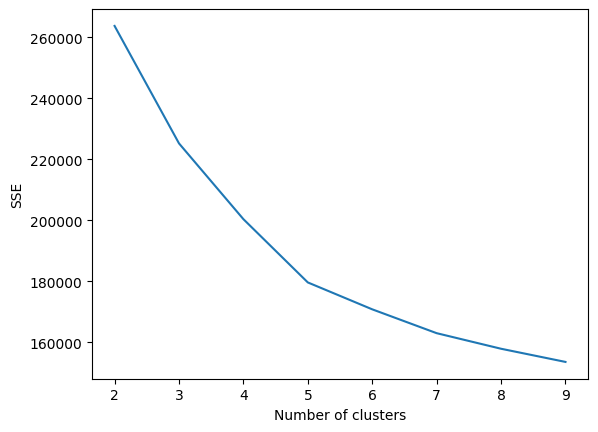

In [33]:
plt.plot(ks, sse)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

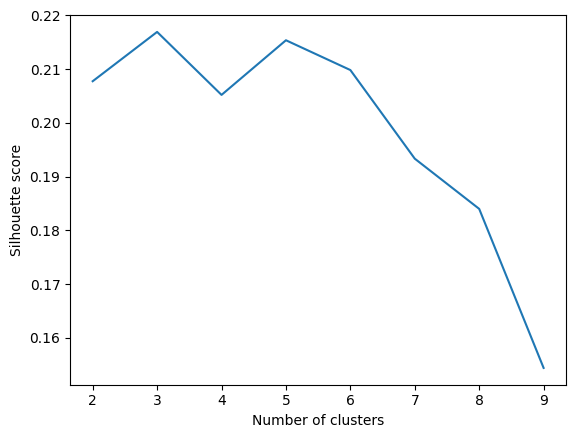

In [34]:
plt.plot(ks, silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

In [35]:
from sklearn.cluster import BisectingKMeans

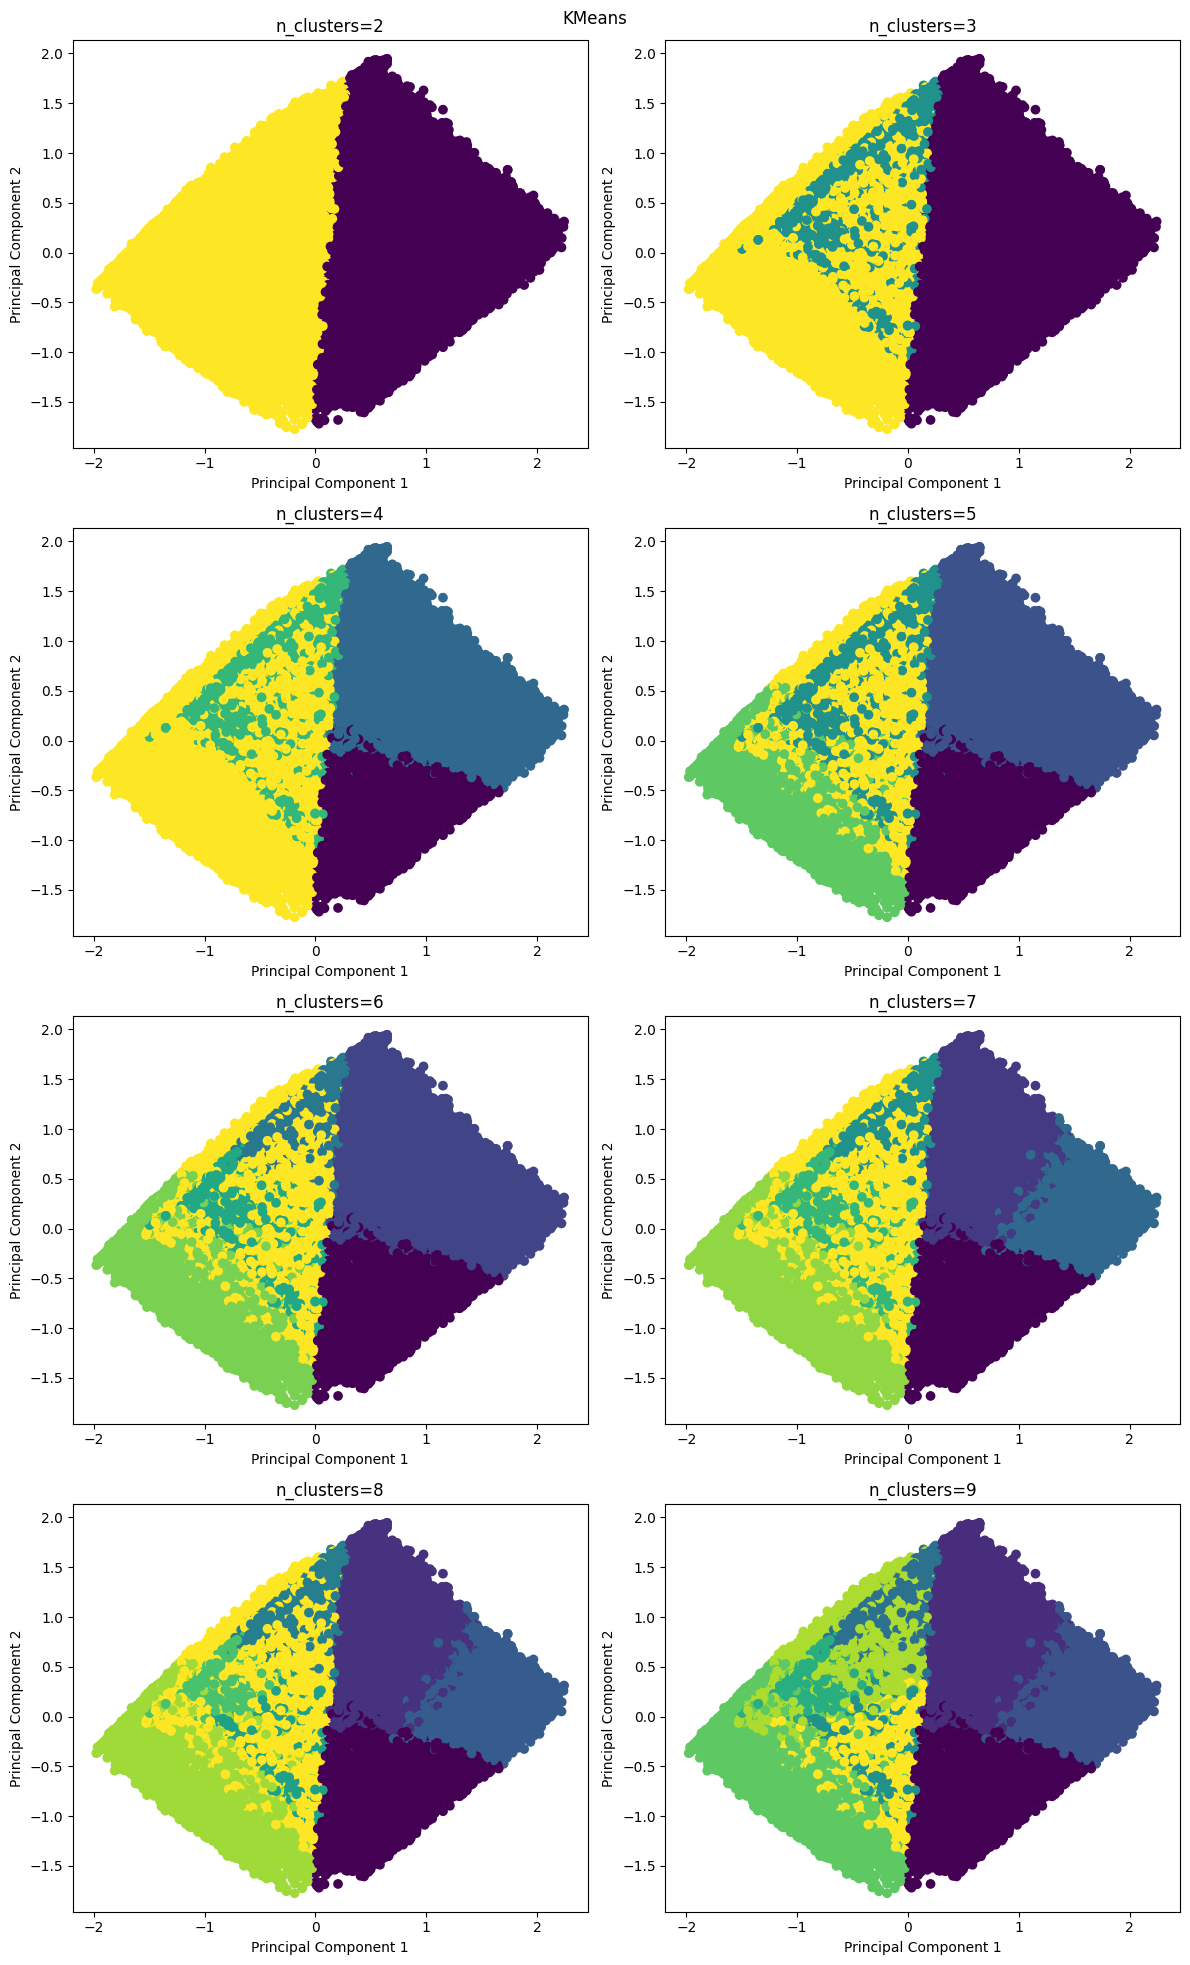

In [36]:
sse_bisecting = []
silhouettes_bisecting = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    bkmeans = BisectingKMeans(n_clusters=k, bisecting_strategy='largest_cluster', random_state=55)
    bkmeans.fit(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=bkmeans.labels_)
    ax.set_title(f"n_clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse_bisecting.append(bkmeans.inertia_)
    silhouettes_bisecting.append(silhouette_score(X, bkmeans.labels_))

plt.tight_layout()
plt.show()


In [37]:
sse_bisecting

[263731.1634654197,
 225935.057502248,
 205899.84939875378,
 194725.13075724297,
 184867.50787490164,
 174502.49442995555,
 170103.60985957965,
 163867.73257156168]

Text(0, 0.5, 'SSE')

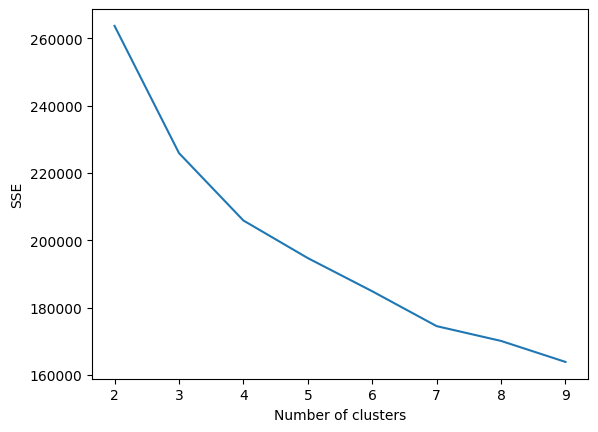

In [38]:
plt.plot(ks, sse_bisecting)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

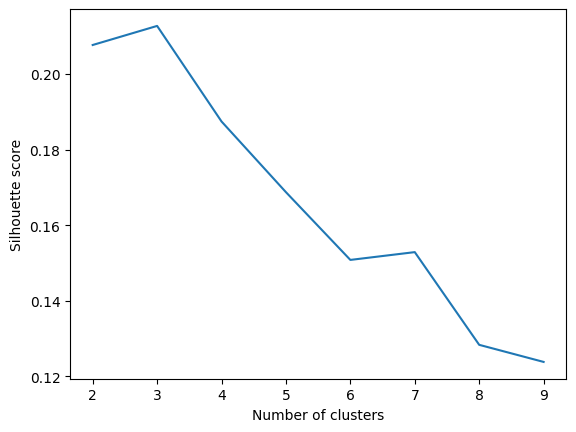

In [39]:
plt.plot(ks, silhouettes_bisecting)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

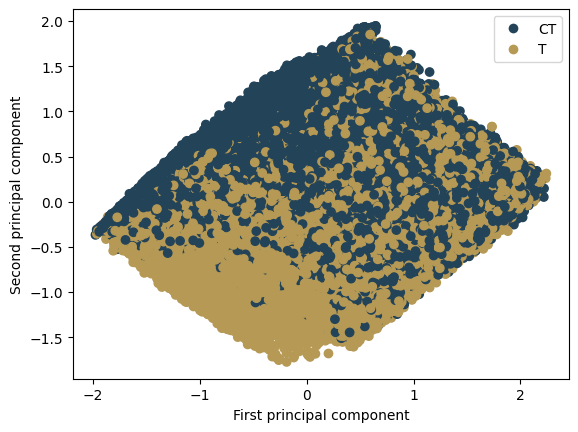

In [40]:
color_mapping = {0: '#234359', 1: '#b59955'}
colors = [color_mapping[team] for team in y]

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, label=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='CT', markerfacecolor='#234359', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='#b59955', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

In [41]:
def clustering_score(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score

In [42]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=55)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=55)

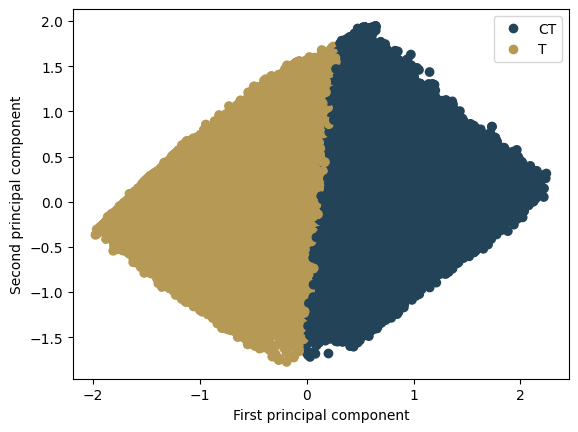

In [43]:
color_mapping = {0: '#234359', 1: '#b59955'}
colors = [color_mapping[team] for team in kmeans.labels_]

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, label=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='CT', markerfacecolor='#234359', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='#b59955', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

In [44]:
clustering_score(y, kmeans.labels_)

50.47553681733503

In [45]:
bkmeans = BisectingKMeans(n_clusters=2, bisecting_strategy='largest_cluster', random_state=55)
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=2,
                random_state=55)

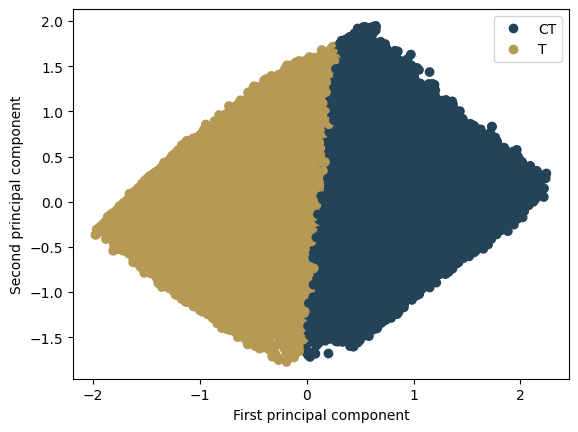

In [46]:
color_mapping = {0: '#234359', 1: '#b59955'}
colors = [color_mapping[team] for team in bkmeans.labels_]

scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, label=colors)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='CT', markerfacecolor='#234359', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='T', markerfacecolor='#b59955', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

In [47]:
clustering_score(y, bkmeans.labels_)

50.49678073013693